# **SECTION_01 PROJECT**

# 다음 분기에 어떤 게임을 설계해야 할까?

---

## 목차

## 1. 데이터 전처리
## 2. 지역에 따라 선호하는 게임 장르가 다를까?
## 3. 연도별 게임의 트렌드가 있을까?
## 4. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


---

# 1. Data Preprocessing ( 데이터 전처리 )

## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from scipy import stats

# 한글깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 데이터 로드 및 전체 행 열

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [3]:
import pandas as pd

df = pd.read_csv('vgames2.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
# Unnamed: 0 열 제외한 나머지 열 선택
df1 = df.loc[:, ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# datatype 확인
print(df1.dtypes)

print('---')

df1.head()

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object
---


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
# sales의 K를 없애고 1000으로 나눠서 단위 M으로 통일
def no_K(string):
    return str(int(string.replace('K',''))/1000)

# sales의 M를 없애고 모두 float화
def tonum(string):
    string = string.replace('M', '')
    string = float(string)
    return string

# 전체 sales 그룹 리스트
total_group = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']

In [6]:
# 쿼리를 통해 K가 포함된 인덱스를 찾아서 그 인덱스에 'no_K' 함수를 적용
# no_K 함수 : K가 들어간 string 제거
for i in range(4):
    index = df1.query('{}.str.contains("K")'.format(total_group[i]), engine='python').index
    df1.iloc[index, 5+i] = df1.iloc[index, 5+i].apply(no_K)

In [7]:
# Sales열에 'tonum' 함수를 적용
# tonum 함수 : string M을 없애고 모든 값을 float(실수)화
for i in range(4):
    df1[total_group[i]] = df1[total_group[i]].apply(tonum)

In [8]:
# datatype 확인
print(df1.dtypes)

df1.head()

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


# 2. 지역에 따라 선호하는 게임 장르가 다를까?
* `Genre, NA_Sales, EU_Sales, JP_Sales, Other_Sales` 데이터 추출
1. ANOVA TEST로 지역별 선호하는 게임 장르 비교
  * **귀무가설** : 지역에 따라 출고되는 게임 장르에 차이가 없다.
  * **대립가설** : 지역에 따라 출고되는 게임 장르에 차이가 있다.
2. 장르에 따른 지역별 Sales 시각화

## 1.1 ANOVA TEST로 지역별 선호하는 게임 장르 비교
* 귀무가설 : 지역에 따라 출고되는 게임 장르에 차이가 없다.
* 대립가설 : 지역에 따라 출고되는 게임 장르에 차이가 있다.

In [9]:
# 장르와 Sales 데이터만 선택
df2 = df1.loc[:, ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# 결측치 확인
print('결측치')
print('---')
print(df2.isna().sum())
print('---')

# df 크기 확인
print('df shape :', df2.shape)
print('---')

df2.head()

결측치
---
Genre          50
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64
---
df shape : (16598, 5)
---


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04


In [10]:
# Genre의 na값 제거
df3 = df2.dropna()

# df 크기 확인
print('df shape :', df3.shape)
print('---')

df3.head()

df shape : (16548, 5)
---


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04


In [11]:
# 지역에 따라 장르별 평균이 다른지 ANOVA TEST 진행

# 중복값 제거하여 몇개의 장르가 있는지 확인
genre_list = df3.drop_duplicates(['Genre'])
genre_list1 = list(genre_list['Genre'])
genre_list1

['Action',
 'Adventure',
 'Misc',
 'Platform',
 'Sports',
 'Simulation',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Strategy',
 'Fighting',
 'Shooter']

In [12]:
# 0인값을 유의미한 숫자라고 판단하여 제거 // 0인 값을 출시를 하지 않은 곳이라고 판단.
# 0K 와 0M인 값은 분석에 큰 지장이 없다고 생각하여 0인 값과 동일하게 처리했다.
df4 = df3.replace(0, np.NaN)

df4_NA = df4.loc[:, ['Genre', 'NA_Sales']]
df4_EU = df4.loc[:, ['Genre', 'EU_Sales']]
df4_JP = df4.loc[:, ['Genre', 'JP_Sales']]
df4_Other = df4.loc[:, ['Genre', 'Other_Sales']]

df4_NA = df4_NA.dropna(axis=0)
df4_EU = df4_EU.dropna(axis=0)
df4_JP = df4_JP.dropna(axis=0)
df4_Other = df4_Other.dropna(axis=0)

In [13]:
print('df shape')
print(df4_NA.shape)
print(df4_EU.shape)
print(df4_JP.shape)
print(df4_Other.shape)

df shape
(12058, 2)
(10835, 2)
(6127, 2)
(10088, 2)


In [14]:
df4_NA.head()

,Genre,NA_Sales
0,Action,0.04
1,Action,0.17
3,Misc,0.04
4,Platform,0.12
6,Simulation,0.02


In [15]:
# 각 genre값들만 추출하는 함수
def Genre_sales(df, genre):
    condition = (df.Genre == genre)
    return df[condition]

list_NA_genre, list_EU_genre, list_JP_genre, list_Other_genre = [], [], [], []

# NA_genre값을 추출한 후 그 값들에 변수이름 할당
for i in range(len(genre_list1)):
    globals()['NA_genre{}'.format(i)] = Genre_sales(df4_NA, genre_list1[i])
    globals()['NA_genre{}'.format(i)] = (globals()['NA_genre{}'.format(i)]).reset_index(drop=True)
    list_NA_genre.append(globals()['NA_genre{}'.format(i)])

# EU_genre값을 추출한 후 그 값들에 변수이름 할당
for i in range(len(genre_list1)):
    globals()['EU_genre{}'.format(i)] = Genre_sales(df4_EU, genre_list1[i])
    globals()['EU_genre{}'.format(i)] = (globals()['EU_genre{}'.format(i)]).reset_index(drop=True)
    list_EU_genre.append(globals()['EU_genre{}'.format(i)])

# JP_genre값을 추출한 후 그 값들에 변수이름 할당
for i in range(len(genre_list1)):
    globals()['JP_genre{}'.format(i)] = Genre_sales(df4_JP, genre_list1[i])
    globals()['JP_genre{}'.format(i)] = (globals()['JP_genre{}'.format(i)]).reset_index(drop=True)
    list_JP_genre.append(globals()['JP_genre{}'.format(i)])

# Other_genre값을 추출한 후 그 값들에 변수이름 할당
for i in range(len(genre_list1)):
    globals()['Other_genre{}'.format(i)] = Genre_sales(df4_Other, genre_list1[i])
    globals()['Other_genre{}'.format(i)] = (globals()['Other_genre{}'.format(i)]).reset_index(drop=True)
    list_Other_genre.append(globals()['Other_genre{}'.format(i)])

# 하나의 리스트로 묶기
list_of_genres = [list_NA_genre, list_EU_genre, list_JP_genre, list_Other_genre]

In [16]:
list_pval = []

# oneway ANOVA 검정
for i in range(12):
    F_statistic, pvalue = stats.f_oneway(list_of_genres[0][i]['NA_Sales'], list_of_genres[1][i]['EU_Sales'], list_of_genres[2][i]['JP_Sales'], list_of_genres[3][i]['Other_Sales'])
    list_pval.append(pvalue)
    print('F_statistic :', F_statistic)
    print('pvalue :', pvalue)
    print('---')

print(list_pval)

F_statistic : 129.1272475561808
pvalue : 9.218667331895224e-82
---
F_statistic : 40.42400447402174
pvalue : 1.9750635183836324e-25
---
F_statistic : 40.57170943297855
pvalue : 8.591871916922402e-26
---
F_statistic : 27.336472815620276
pvalue : 2.2208843150711248e-17
---
F_statistic : 31.150609256119065
pvalue : 5.795619170925308e-20
---
F_statistic : 24.10205670186922
pvalue : 2.5962744618052647e-15
---
F_statistic : 22.68410686091902
pvalue : 1.5773673595405046e-14
---
F_statistic : 34.63848830650298
pvalue : 4.724037964344147e-22
---
F_statistic : 7.88730523454609
pvalue : 3.2659641169703675e-05
---
F_statistic : 28.76089998642172
pvalue : 4.975088335172671e-18
---
F_statistic : 59.70606385710722
pvalue : 4.910974982817187e-37
---
F_statistic : 50.079725768492764
pvalue : 1.0862306242238213e-31
---
[9.218667331895224e-82, 1.9750635183836324e-25, 8.591871916922402e-26, 2.2208843150711248e-17, 5.795619170925308e-20, 2.5962744618052647e-15, 1.5773673595405046e-14, 4.724037964344147e-22,

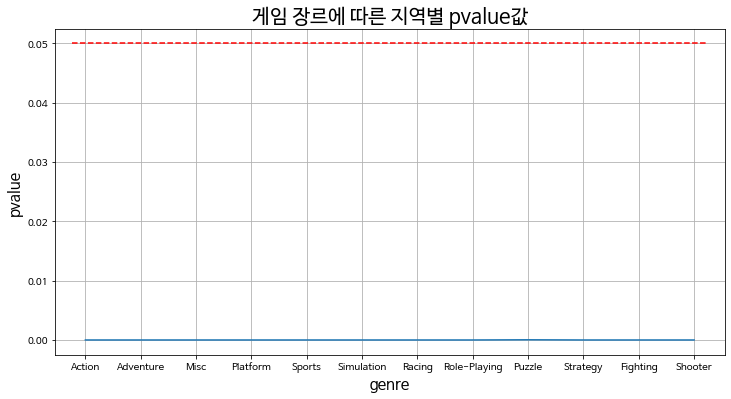

In [17]:
# pvalue값 시각화

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12,6))
plt.plot(list_pval)
plt.axhline(0.05, xmin = 0.025, xmax = 0.975, color = 'red',linestyle = '--', linewidth = 1.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], labels = genre_list1)
plt.yticks(np.arange(0, 0.06, 0.01))
plt.grid(True)
plt.title('게임 장르에 따른 지역별 pvalue값', fontsize=20)
plt.xlabel('genre', fontsize=15)
plt.ylabel('pvalue', fontsize=15)
plt.show()

## ANOVA TEST

* 귀무가설 : 지역에 따라 판매되는 게임 장르에 차이가 없다.
* 대립가설 : 지역에 따라 판매되는 게임 장르에 차이가 있다.

모든 pvalue값이 0.05보다 작으므로 귀무가설을 기각한다.

> **결론 : 지역에 따라 판매되는 게임 장르에 차이가 있다.**

## 1.2 장르에 따른 지역별 Sales 시각화

In [18]:
# 장르에 따른 지역별 Sales 합 리스트화
NA_sum, EU_sum, JP_sum, Other_sum = [], [], [], []

for i in range(12):
    NA_sum.append(list_of_genres[0][i].iloc[:,1].sum())
    EU_sum.append(list_of_genres[1][i].iloc[:,1].sum())
    JP_sum.append(list_of_genres[2][i].iloc[:,1].sum())
    Other_sum.append(list_of_genres[3][i].iloc[:,1].sum())

# 각 지역 Sales 합 리스트화
list_sum = [NA_sum, EU_sum, JP_sum, Other_sum]

# 전체 sales 그룹 리스트
# total_group = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']

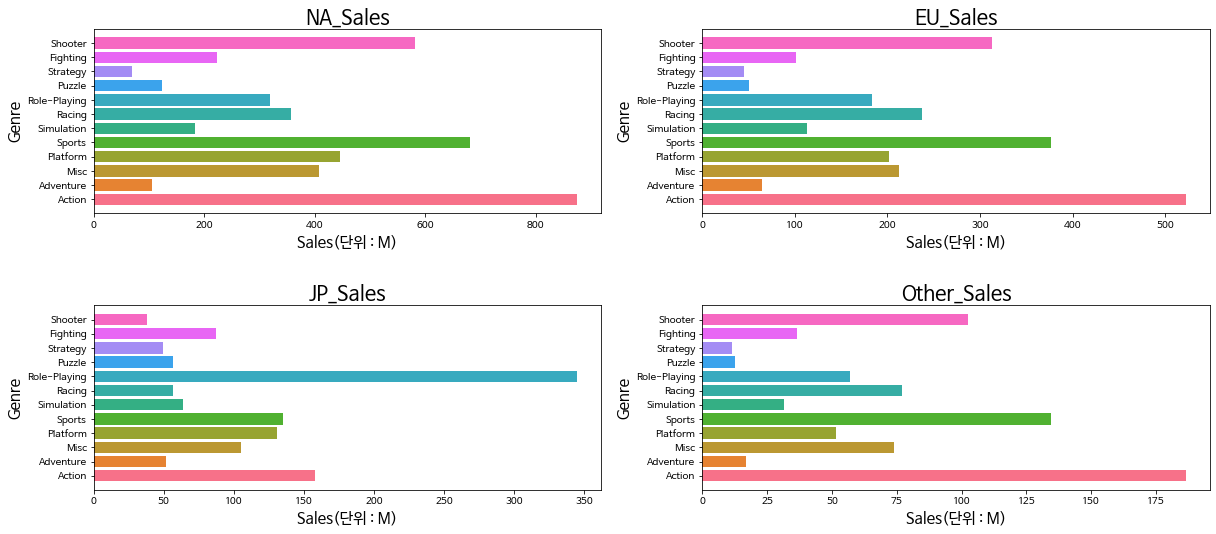

In [19]:
# 장르에 따른 지역별 Sales 시각화
colors1 = sns.color_palette('husl',len(genre_list1))   # seaborn의 'husl' 팔레트

fig = plt.figure(figsize=(20, 8))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.barh(genre_list1, list_sum[i], color=colors1)
    plt.title(total_group[i], fontsize=20)
    plt.xlabel('Sales(단위 : M)', fontsize=15)
    plt.ylabel('Genre', fontsize=15)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
plt.show()

# 가설 2. 연도별 게임의 트렌드가 있을까?
1. 연도별 지역 출고량 비교
2. 연도별 게임 장르에 따른 전 지역 총 출고량 비교
3. 연도별 게임 플랫폼에 따른 전 지역 총 출고량 비교

In [20]:
# year의 두자리수 변환 >> yyyy의 형태로 변환
# 20 아래의 수는 2000을 더하고, 20 이상의 수는 1900을 더한다.
def Year(num):
    if num <= 20:
        num = num + 2000
        return num
    elif num >=20 and num <= 100:
        num = num + 1900
        return num
    else:
        return num

In [21]:
# Year열의 'Year' 함수 적용
# Year 함수 : yyyy의 형태로 변환
df1['Year'] = df1['Year'].apply(Year)

# df 크기 확인
print('df shape :', df1.shape)
print('---')

# 결측치 확인
print(df1.isna().sum())
print('---')

df shape : (16598, 9)
---
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
---


## 2.1 연도별 지역 출고량 비교

In [22]:
# 연도, 각 지역 sales 데이터 추출
df1_YS = df1.loc[:, ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# df 크기 확인
print('df shape :', df1_YS.shape)
print('---')

# 결측치 확인
print(df1_YS.isna().sum())
print('---')

df1_YS.head()

df shape : (16598, 5)
---
Year           271
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
---


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2008.0,0.04,0.00,0.00,0.00
1,2009.0,0.17,0.00,0.00,0.01
2,2010.0,0.00,0.00,0.02,0.00
3,2010.0,0.04,0.00,0.00,0.00
4,2010.0,0.12,0.09,0.00,0.04


In [23]:
# 결측치 제거
df1_YS = df1_YS.dropna()

# df 크기 확인
print(df1_YS.shape)

# datatype 확인
df1_YS.dtypes

(16327, 5)


Year           float64
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [24]:
# 같은 연도끼리 합치기
df1_YS1 = df1_YS.groupby('Year').sum()
df1_YS1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70


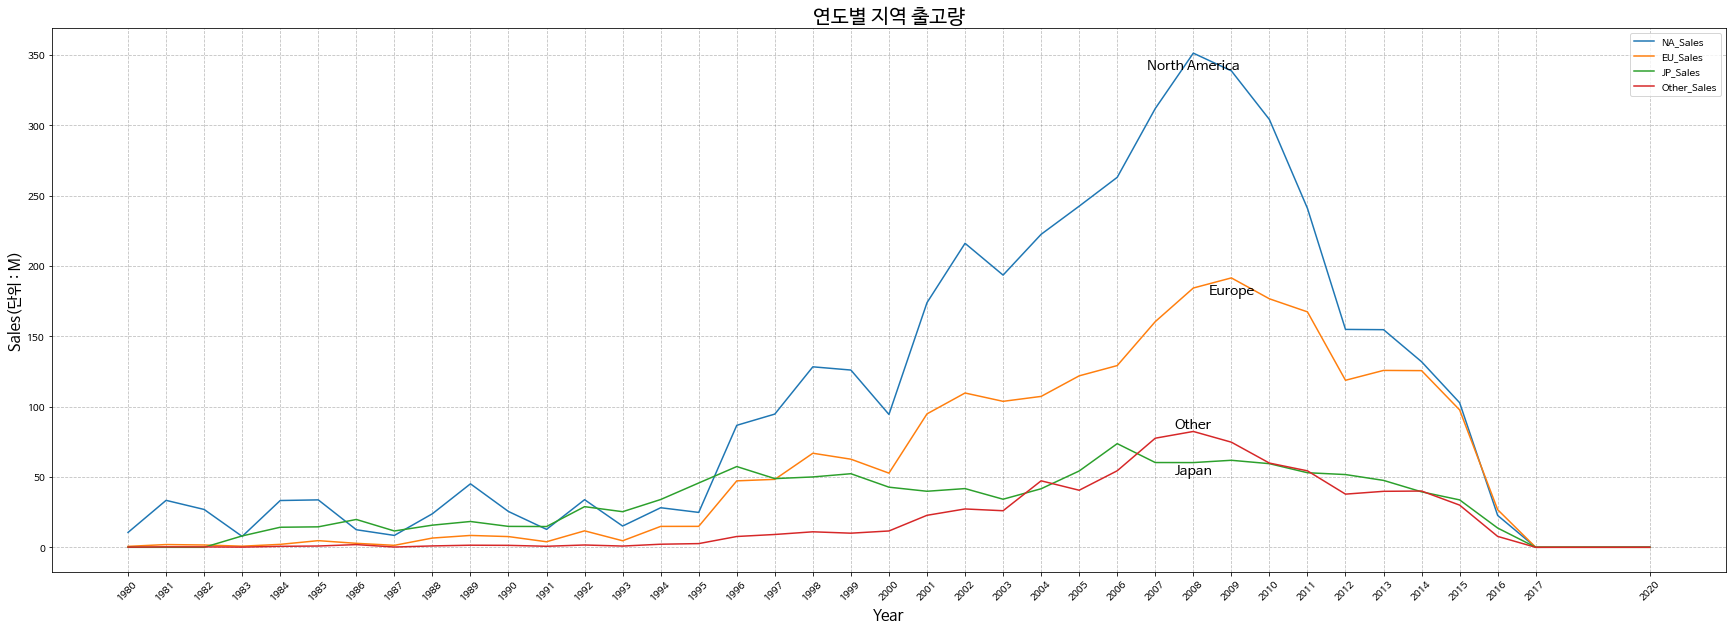

In [25]:
# 연도별 지역 출고량 line plot
fig = plt.figure(figsize=(30, 10))

plt.plot(df1_YS1.index, df1_YS1.NA_Sales, label='NA_Sales')
plt.plot(df1_YS1.index, df1_YS1.EU_Sales, label='EU_Sales')
plt.plot(df1_YS1.index, df1_YS1.JP_Sales, label='JP_Sales')
plt.plot(df1_YS1.index, df1_YS1.Other_Sales, label='Other_Sales')

plt.xticks(df1_YS1.index, rotation=45)
plt.yticks(np.arange(0,400,50))

plt.annotate('North America', xy=(2008, 340), xytext=(2008, 340), fontsize=14, ha='center')
plt.annotate('Europe', xy=(2009, 180), xytext=(2009, 180), fontsize=14, ha='center')
plt.annotate('Other', xy=(2008, 85), xytext=(2008, 85), fontsize=14, ha='center')
plt.annotate('Japan', xy=(2008, 52), xytext=(2008, 52), fontsize=14, ha='center')

plt.title('연도별 지역 출고량', fontsize=20) 
plt.ylabel('Sales(단위 : M)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend()   # label을 해주지 않으면 legend가 인식을 못한다.
plt.grid(True, color='gray', alpha=0.5, linestyle='--')
plt.show()

## 2.2 연도별 게임 장르에 따른 전 지역 총 판매량 비교

In [26]:
# 연도별 장르, sales 추출
df1_YGS = df1.loc[:, ['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# sales 데이터 합치기
df1_YGS['Total_Sales'] = df1_YGS['NA_Sales'] + df1_YGS['EU_Sales'] + df1_YGS['JP_Sales'] + df1_YGS['Other_Sales']
df1_YGS1 = df1_YGS.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# 결측치 확인
print(df1_YGS1.isna().sum())
print('---')

# df shape 확인
print(df1_YGS1.shape)
print('---')

df1_YGS1.head()

Year           271
Genre           50
Total_Sales      0
dtype: int64
---
(16598, 3)
---


,Year,Genre,Total_Sales
0,2008.0,Action,0.04
1,2009.0,Action,0.18
2,2010.0,Adventure,0.02
3,2010.0,Misc,0.04
4,2010.0,Platform,0.25


In [27]:
# 결측치 제거
df1_YGS2 = df1_YGS1.dropna()

# df shpae 확인
print(df1_YGS2.shape)
print('---')

df1_YGS2.head()

(16277, 3)
---


,Year,Genre,Total_Sales
0,2008.0,Action,0.04
1,2009.0,Action,0.18
2,2010.0,Adventure,0.02
3,2010.0,Misc,0.04
4,2010.0,Platform,0.25


In [28]:
# 중복없는 장르 연도별 리스트
Year_list_genre = df1_YGS2.drop_duplicates(['Year'])
Year_list_genre1 = list(Year_list_genre['Year'])
print(Year_list_genre1)

[2008.0, 2009.0, 2010.0, 2005.0, 2011.0, 2007.0, 2001.0, 2003.0, 2006.0, 2014.0, 2015.0, 2002.0, 1997.0, 2013.0, 1996.0, 2004.0, 2000.0, 1984.0, 1998.0, 2016.0, 1985.0, 1999.0, 1995.0, 1993.0, 2012.0, 1987.0, 1982.0, 1994.0, 1990.0, 1992.0, 1991.0, 1983.0, 1988.0, 1981.0, 1989.0, 1986.0, 2017.0, 1980.0, 2020.0]


In [29]:
# 각 genre값들만 추출하는 함수
def Genre_sales(df, genre):
    condition = (df.Genre == genre)
    return df[condition]

# genre값을 추출한 후 그 값들에 변수이름 할당
list_YGS_genre = []

for i in range(len(genre_list1)):
    globals()['YGS_genre{}'.format(i)] = Genre_sales(df1_YGS2, genre_list1[i])
    globals()['YGS_genre{}'.format(i)] = (globals()['YGS_genre{}'.format(i)]).reset_index(drop=True)
    list_YGS_genre.append(globals()['YGS_genre{}'.format(i)])

# 장르별 같은 연도끼리 합치기
for i in range(len(list_YGS_genre)):
    list_YGS_genre[i] = list_YGS_genre[i].groupby('Year').sum()
    list_YGS_genre[i] = list_YGS_genre[i].reset_index(drop=False)

In [30]:
list_YGS_genre[0].head()  # 데이터 그냥 확인함 // genre0은 Action

,Year,Total_Sales
0,1980.0,0.34
1,1981.0,14.79
2,1982.0,6.50
3,1983.0,2.86
4,1984.0,1.85


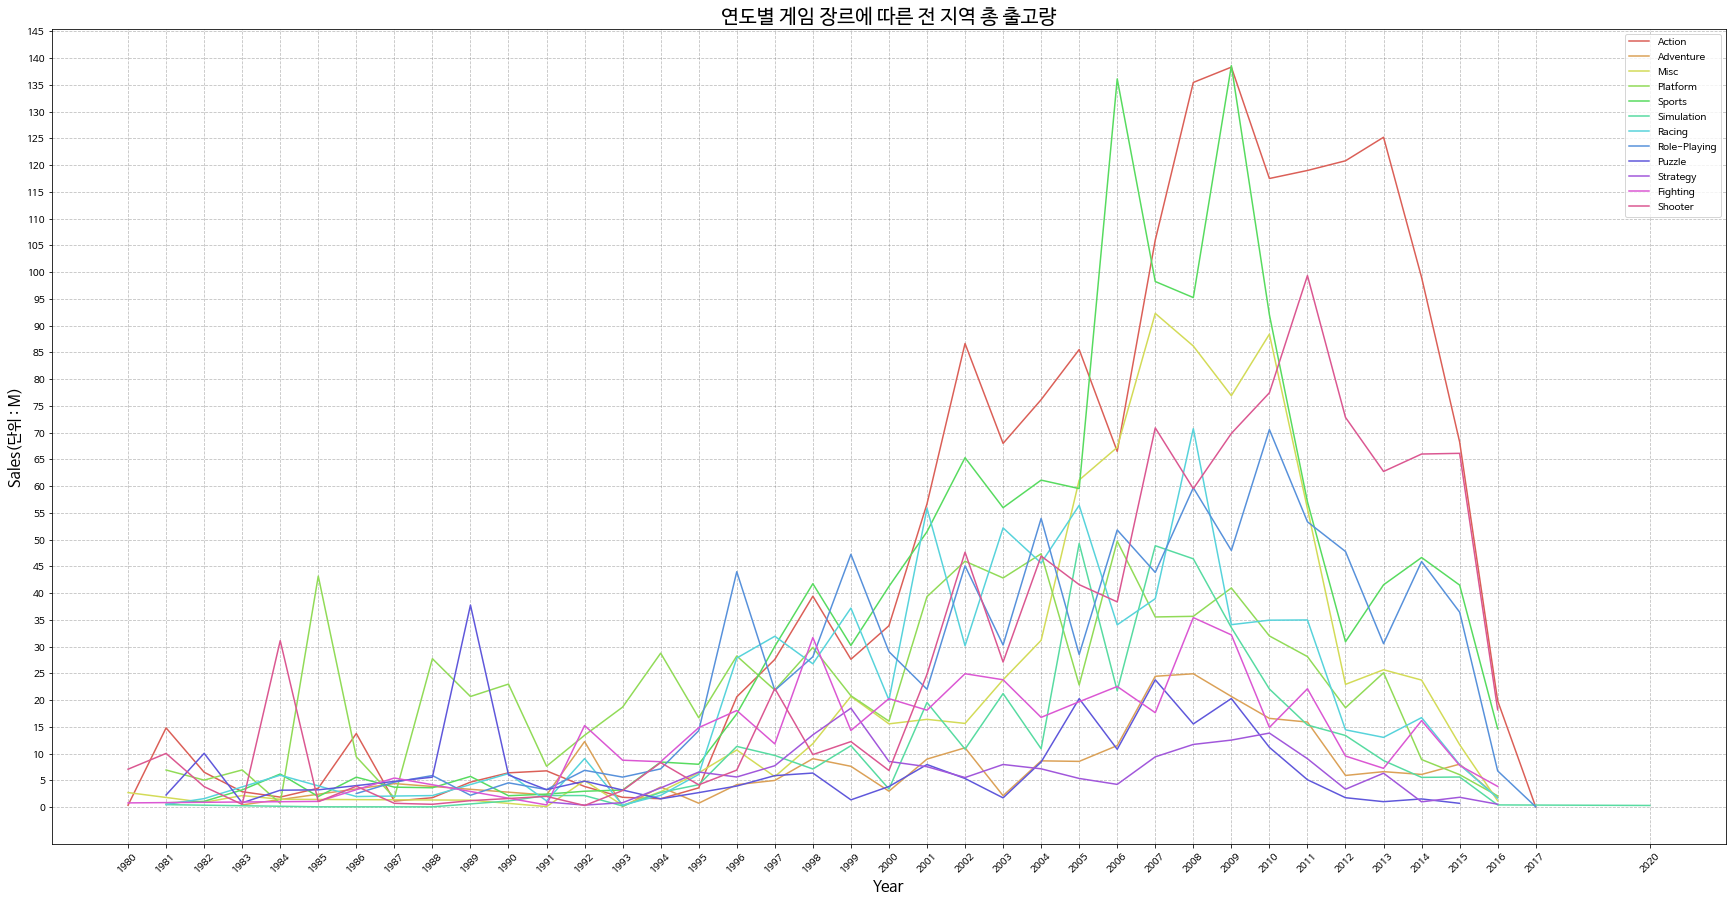

In [31]:
# 연도별 게임 장르에 따른 전 지역 총 출고량 비교
colors2 = sns.color_palette('hls',len(genre_list1))
fig = plt.figure(figsize=(30, 15))

for i in range(len(list_YGS_genre)):
    plt.plot(list_YGS_genre[i].Year, list_YGS_genre[i].Total_Sales, color=colors2[i], label=genre_list1[i])

plt.xticks(Year_list_genre1, rotation=45)
plt.yticks(np.arange(0, 150, 5))

plt.title('연도별 게임 장르에 따른 전 지역 총 출고량', fontsize=20) 
plt.ylabel('Sales(단위 : M)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend()
plt.grid(True, color='gray', alpha=0.5, linestyle='--')
plt.show()

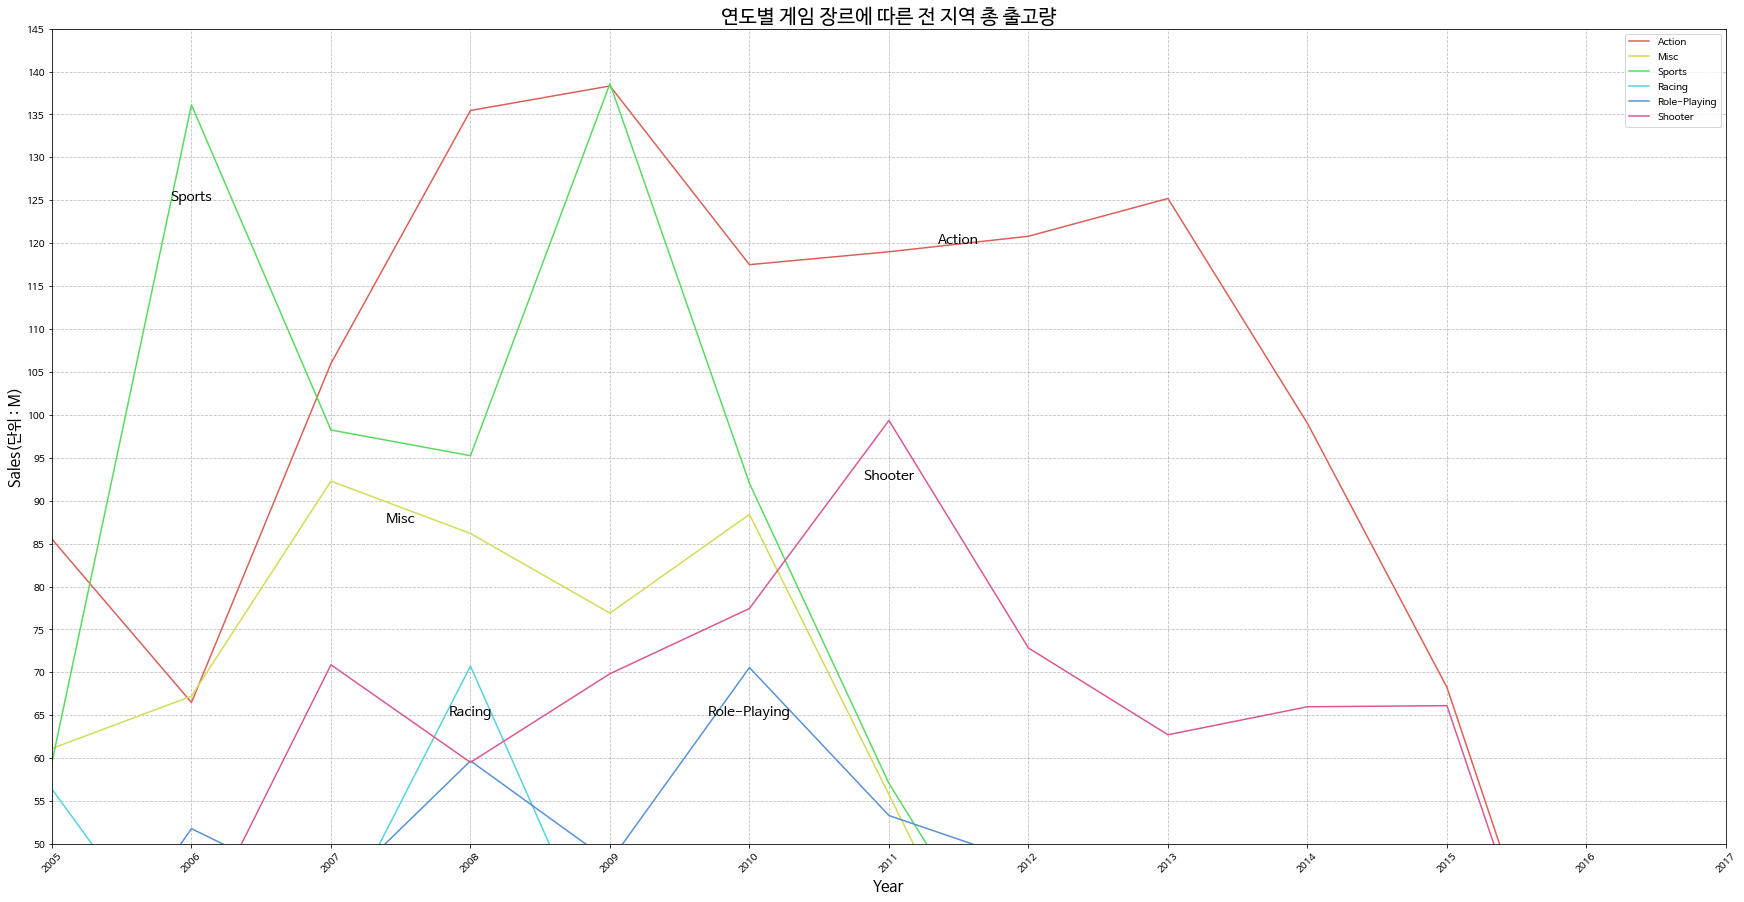

In [32]:
# 연도별 게임 장르에 따른 전 지역 총 출고량 비교 // 50M 이상
colors2 = sns.color_palette('hls',len(genre_list1))
fig = plt.figure(figsize=(30, 15))

plt.plot(list_YGS_genre[0].Year, list_YGS_genre[0].Total_Sales, color=colors2[0], label=genre_list1[0])       # Action
plt.plot(list_YGS_genre[2].Year, list_YGS_genre[2].Total_Sales, color=colors2[2], label=genre_list1[2])       # Misc
plt.plot(list_YGS_genre[4].Year, list_YGS_genre[4].Total_Sales, color=colors2[4], label=genre_list1[4])       # Sports
plt.plot(list_YGS_genre[6].Year, list_YGS_genre[6].Total_Sales, color=colors2[6], label=genre_list1[6])       # Racing
plt.plot(list_YGS_genre[7].Year, list_YGS_genre[7].Total_Sales, color=colors2[7], label=genre_list1[7])       # Role-playing
plt.plot(list_YGS_genre[11].Year, list_YGS_genre[11].Total_Sales, color=colors2[11], label=genre_list1[11])   # Shooter

plt.annotate('Action', xy=(2011.5, 120), xytext=(2011.5, 120), fontsize=14, ha='center')
plt.annotate('Sports', xy=(2006, 125), xytext=(2006, 125), fontsize=14, ha='center')
plt.annotate('Shooter', xy=(2011, 92.5), xytext=(2011, 92.5), fontsize=14, ha='center')
plt.annotate('Misc', xy=(2007.5, 87.5), xytext=(2007.5, 87.5), fontsize=14, ha='center')
plt.annotate('Role-Playing', xy=(2010, 65), xytext=(2010, 65), fontsize=14, ha='center')
plt.annotate('Racing', xy=(2008, 65), xytext=(2008, 65), fontsize=14, ha='center')

plt.xticks(Year_list_genre1, rotation=45)
plt.yticks(np.arange(0, 150, 5))

plt.xlim(2005, 2017)
plt.ylim(50, 145)

plt.title('연도별 게임 장르에 따른 전 지역 총 출고량', fontsize=20) 
plt.ylabel('Sales(단위 : M)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend()
plt.grid(True, color='gray', alpha=0.5, linestyle='--')
plt.show()

## 2.3 연도별 게임 플랫폼에 따른 전 지역 총 출고량 비교

In [33]:
# 연도, platform, sales 데이터 추출
df1_YPS = df1.loc[:, ['Year', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# sales 데이터 합치기
df1_YPS['Total_Sales'] = df1_YPS['NA_Sales'] + df1_YPS['EU_Sales'] + df1_YPS['JP_Sales'] + df1_YPS['Other_Sales']
df1_YPS1 = df1_YPS.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# 결측치 확인
print(df1_YPS1.isna().sum())
print('---')

# df shape 확인
print(df1_YPS1.shape)
print('---')

df1_YPS1.head()

Year           271
Platform         0
Total_Sales      0
dtype: int64
---
(16598, 3)
---


,Year,Platform,Total_Sales
0,2008.0,DS,0.04
1,2009.0,Wii,0.18
2,2010.0,PSP,0.02
3,2010.0,DS,0.04
4,2010.0,PS3,0.25


In [34]:
# 결측치 제거
df1_YPS2 = df1_YPS1.dropna()

# df shape 확인
print(df1_YPS2.shape)
print('---')

df1_YPS2.head()

(16327, 3)
---


,Year,Platform,Total_Sales
0,2008.0,DS,0.04
1,2009.0,Wii,0.18
2,2010.0,PSP,0.02
3,2010.0,DS,0.04
4,2010.0,PS3,0.25


In [35]:
# 중복값 제거하여 몇개의 Platform이 있는지 확인
Platform_list = df1_YPS2.drop_duplicates(['Platform'])
Platform_list1 = list(Platform_list['Platform'])
print(Platform_list1)
print('---')

# 중복값 제거하여 몇개의 Year가 있는지 확인
Year_list_platform = df1_YPS2.drop_duplicates(['Year'])
Year_list_platform1 = list(Year_list_platform['Year'])
print(Year_list_platform1)

['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB', 'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64', 'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']
---
[2008.0, 2009.0, 2010.0, 2005.0, 2011.0, 2007.0, 2001.0, 2003.0, 2006.0, 2014.0, 2015.0, 2002.0, 1997.0, 2013.0, 1996.0, 2004.0, 2000.0, 1984.0, 1998.0, 2016.0, 1985.0, 1999.0, 1995.0, 1993.0, 2012.0, 1987.0, 1982.0, 1994.0, 1990.0, 1992.0, 1991.0, 1983.0, 1988.0, 1981.0, 1989.0, 1986.0, 2017.0, 1980.0, 2020.0]


In [36]:
# 각 Platform값들만 추출하는 함수
def Platform_sales(df, Platform):
    condition = (df.Platform == Platform)
    return df[condition]

# Platform값을 추출한 후 그 값들에 변수이름 할당
list_YPS_plat = []

for i in range(len(Platform_list1)):
    globals()['YPS_plat{}'.format(i)] = Platform_sales(df1_YPS2, Platform_list1[i])
    globals()['YPS_plat{}'.format(i)] = (globals()['YPS_plat{}'.format(i)]).reset_index(drop=True)
    list_YPS_plat.append(globals()['YPS_plat{}'.format(i)])

# platform별 같은 연도끼리 합치기
for i in range(len(list_YPS_plat)):
    list_YPS_plat[i] = list_YPS_plat[i].groupby('Year').sum()
    list_YPS_plat[i] = list_YPS_plat[i].reset_index(drop=False)

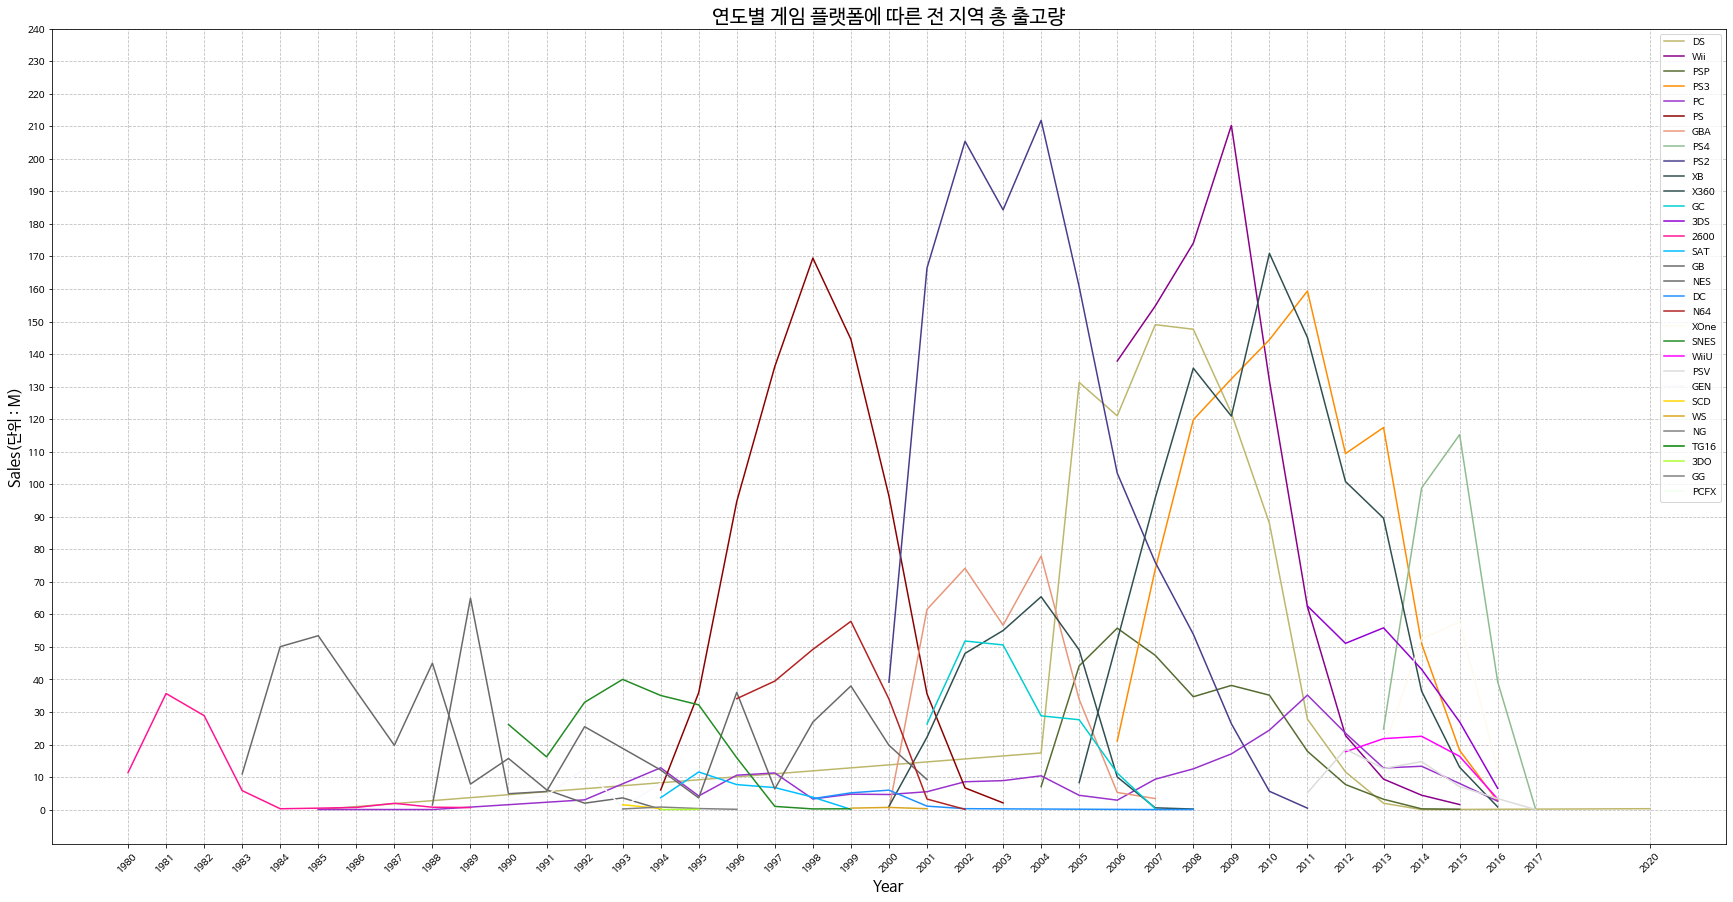

In [37]:
# 연도별 게임 플랫폼에 따른 전 지역 총 판매량 비교
colors3 = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)) # matplotlib의 컬러보드 
fig = plt.figure(figsize=(30, 15))

for i in range(len(list_YPS_plat)):
    plt.plot(list_YPS_plat[i].Year, list_YPS_plat[i].Total_Sales, label=Platform_list1[i], color=colors3[35+i])

plt.xticks(Year_list_platform1, rotation=45)
plt.yticks(np.arange(0, 250, 10))

plt.title('연도별 게임 플랫폼에 따른 전 지역 총 출고량', fontsize=20) 
plt.ylabel('Sales(단위 : M)', fontsize=15)
plt.xlabel('Year', fontsize=15)    # plt.xlim([2010, 2017]) 를 통해 x축 min, max 지정
plt.legend()
plt.grid(True, color='gray', alpha=0.5, linestyle='--')
plt.show()

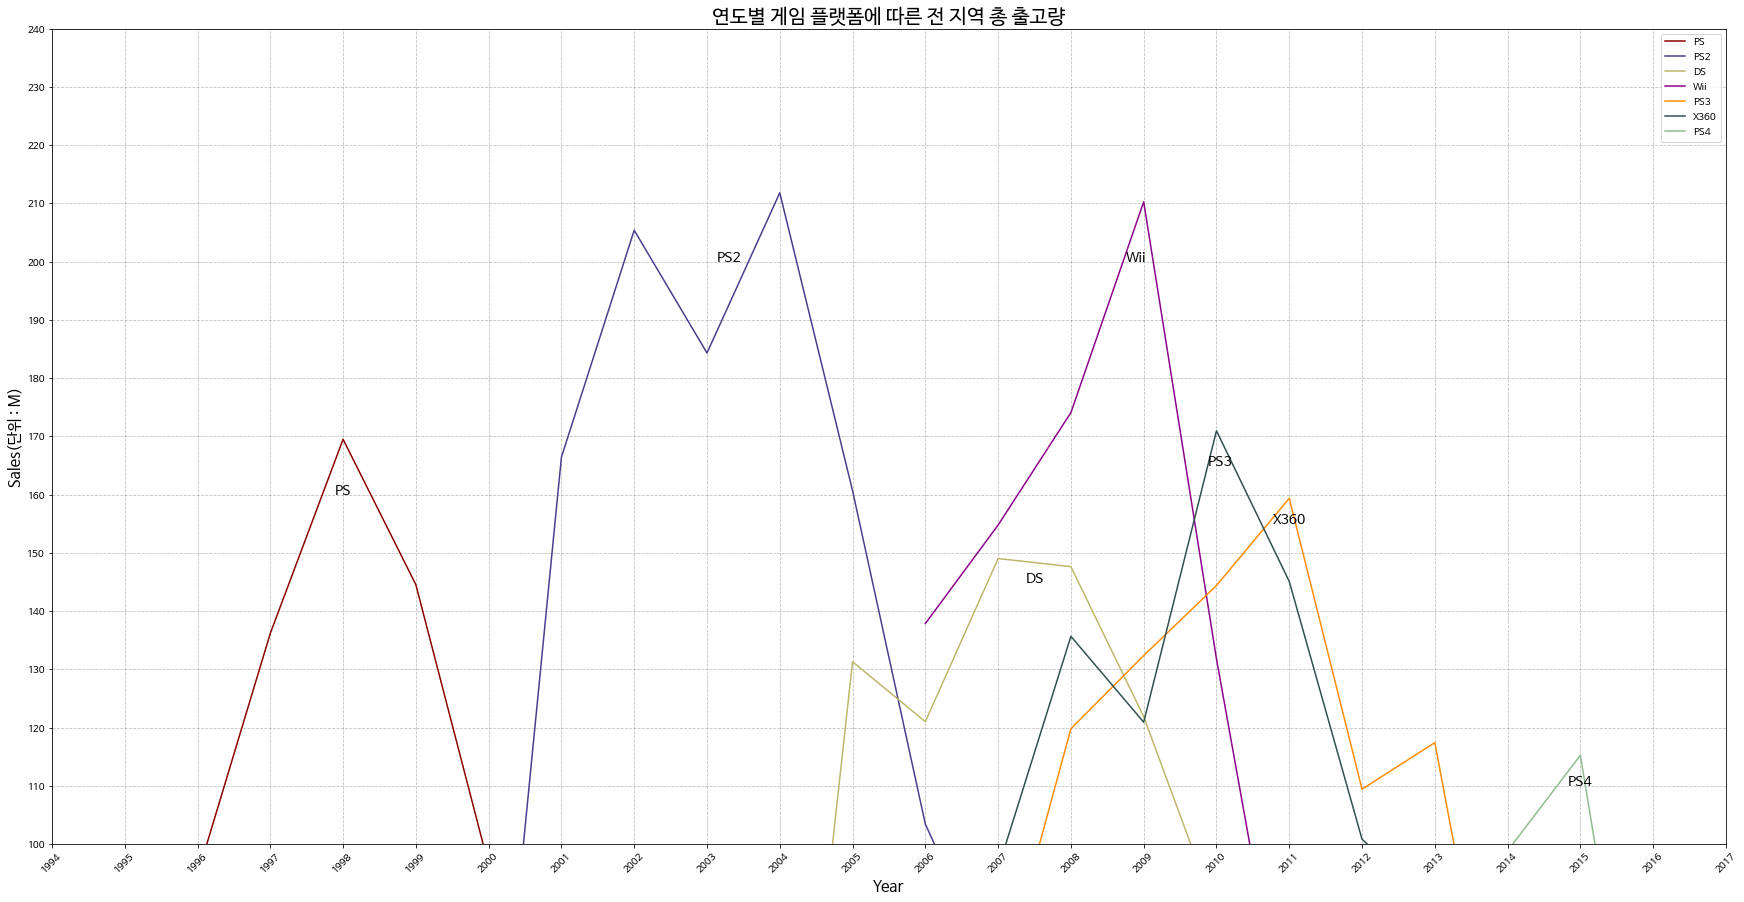

In [38]:
# 연도별 게임 플랫폼에 따른 전 지역 총 판매량 비교 // 100M 이상
colors3 = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)) # matplotlib의 컬러보드 
fig = plt.figure(figsize=(30, 15))

plt.plot(list_YPS_plat[5].Year, list_YPS_plat[5].Total_Sales, label=Platform_list1[5], color=colors3[35+5])   # PS
plt.plot(list_YPS_plat[8].Year, list_YPS_plat[8].Total_Sales, label=Platform_list1[8], color=colors3[35+8])  # PS2
plt.plot(list_YPS_plat[0].Year, list_YPS_plat[0].Total_Sales, label=Platform_list1[0], color=colors3[35+0])  # DS
plt.plot(list_YPS_plat[1].Year, list_YPS_plat[1].Total_Sales, label=Platform_list1[1], color=colors3[35+1])  # Wii
plt.plot(list_YPS_plat[3].Year, list_YPS_plat[3].Total_Sales, label=Platform_list1[3], color=colors3[35+3])  # PS3
plt.plot(list_YPS_plat[10].Year, list_YPS_plat[10].Total_Sales, label=Platform_list1[10], color=colors3[35+10])  # X360
plt.plot(list_YPS_plat[7].Year, list_YPS_plat[7].Total_Sales, label=Platform_list1[7], color=colors3[35+7])  # PS4

plt.xticks(Year_list_platform1, rotation=45)
plt.xlim(1994, 2017)
plt.yticks(np.arange(0, 250, 10))
plt.ylim(100, 240)

plt.annotate('PS', xy=(1998, 170), xytext=(1998, 160), fontsize=14, ha='center')
plt.annotate('PS2', xy=(2003.3, 200), xytext=(2003.3, 200), fontsize=14, ha='center')
plt.annotate('DS', xy=(2007.5, 145), xytext=(2007.5, 145), fontsize=14, ha='center')
plt.annotate('Wii', xy=(2008.9, 200), xytext=(2008.9, 200), fontsize=14, ha='center')
plt.annotate('PS3', xy=(2010.05, 165), xytext=(2010.05, 165), fontsize=14, ha='center')
plt.annotate('X360', xy=(2011, 155), xytext=(2011, 155), fontsize=14, ha='center')
plt.annotate('PS4', xy=(2015, 110), xytext=(2015, 110), fontsize=14, ha='center')

plt.title('연도별 게임 플랫폼에 따른 전 지역 총 출고량', fontsize=20) 
plt.ylabel('Sales(단위 : M)', fontsize=15)
plt.xlabel('Year', fontsize=15)    # plt.xlim([2010, 2017]) 를 통해 x축 min, max 지정
plt.legend()
plt.grid(True, color='gray', alpha=0.5, linestyle='--')
plt.show()

# 가설 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
## 3.1 지역별 출고량 높은 게임 10 순위

## 3.2 지역별 출고량 상위 10개 게임의 장르

## 3.3 지역별 출고량 상위 10개 게임의 플랫폼

## 3.1 지역별  출고량 높은 게임 10 순위

In [39]:
# 결측치 확인
print(df1.isna().sum())
print('---')

df1.head()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
---


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [40]:
# 전체 지역, 각 지역, 게임 이름
df1_game = df1.loc[:, ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1_game['Total_Sales'] = df1_game['NA_Sales'] + df1_game['EU_Sales'] + df1_game['JP_Sales'] + df1_game['Other_Sales']

# 전체 sales 그룹 리스트
# total_group = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']

df1_game.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,0.04,0.00,0.00,0.00,0.04
1,The Munchables,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,0.12,0.09,0.00,0.04,0.25


In [41]:
# 각 sales 데이터 그룹화
df1_game_top10, label_game_names, size_of_game_groups, list_game_top10_sum,  = [], [], [], []

for i in range(5):
    globals()['df1_game_{}_top10'.format(i)] = df1_game.sort_values(by=total_group[i], ascending=False)
    globals()['df1_game_{}_top10'.format(i)] = globals()['df1_game_{}_top10'.format(i)].reset_index(drop=True)
    globals()['df1_game_{}_top10'.format(i)] = globals()['df1_game_{}_top10'.format(i)].drop(globals()['df1_game_{}_top10'.format(i)].index[10:])
    df1_game_top10.append(globals()['df1_game_{}_top10'.format(i)])
    label_game_names.append(globals()['df1_game_{}_top10'.format(i)].Name)
    size_of_game_groups.append(globals()['df1_game_{}_top10'.format(i)][total_group[i]])
    list_game_top10_sum.append(globals()['df1_game_{}_top10'.format(i)][total_group[i]].sum())

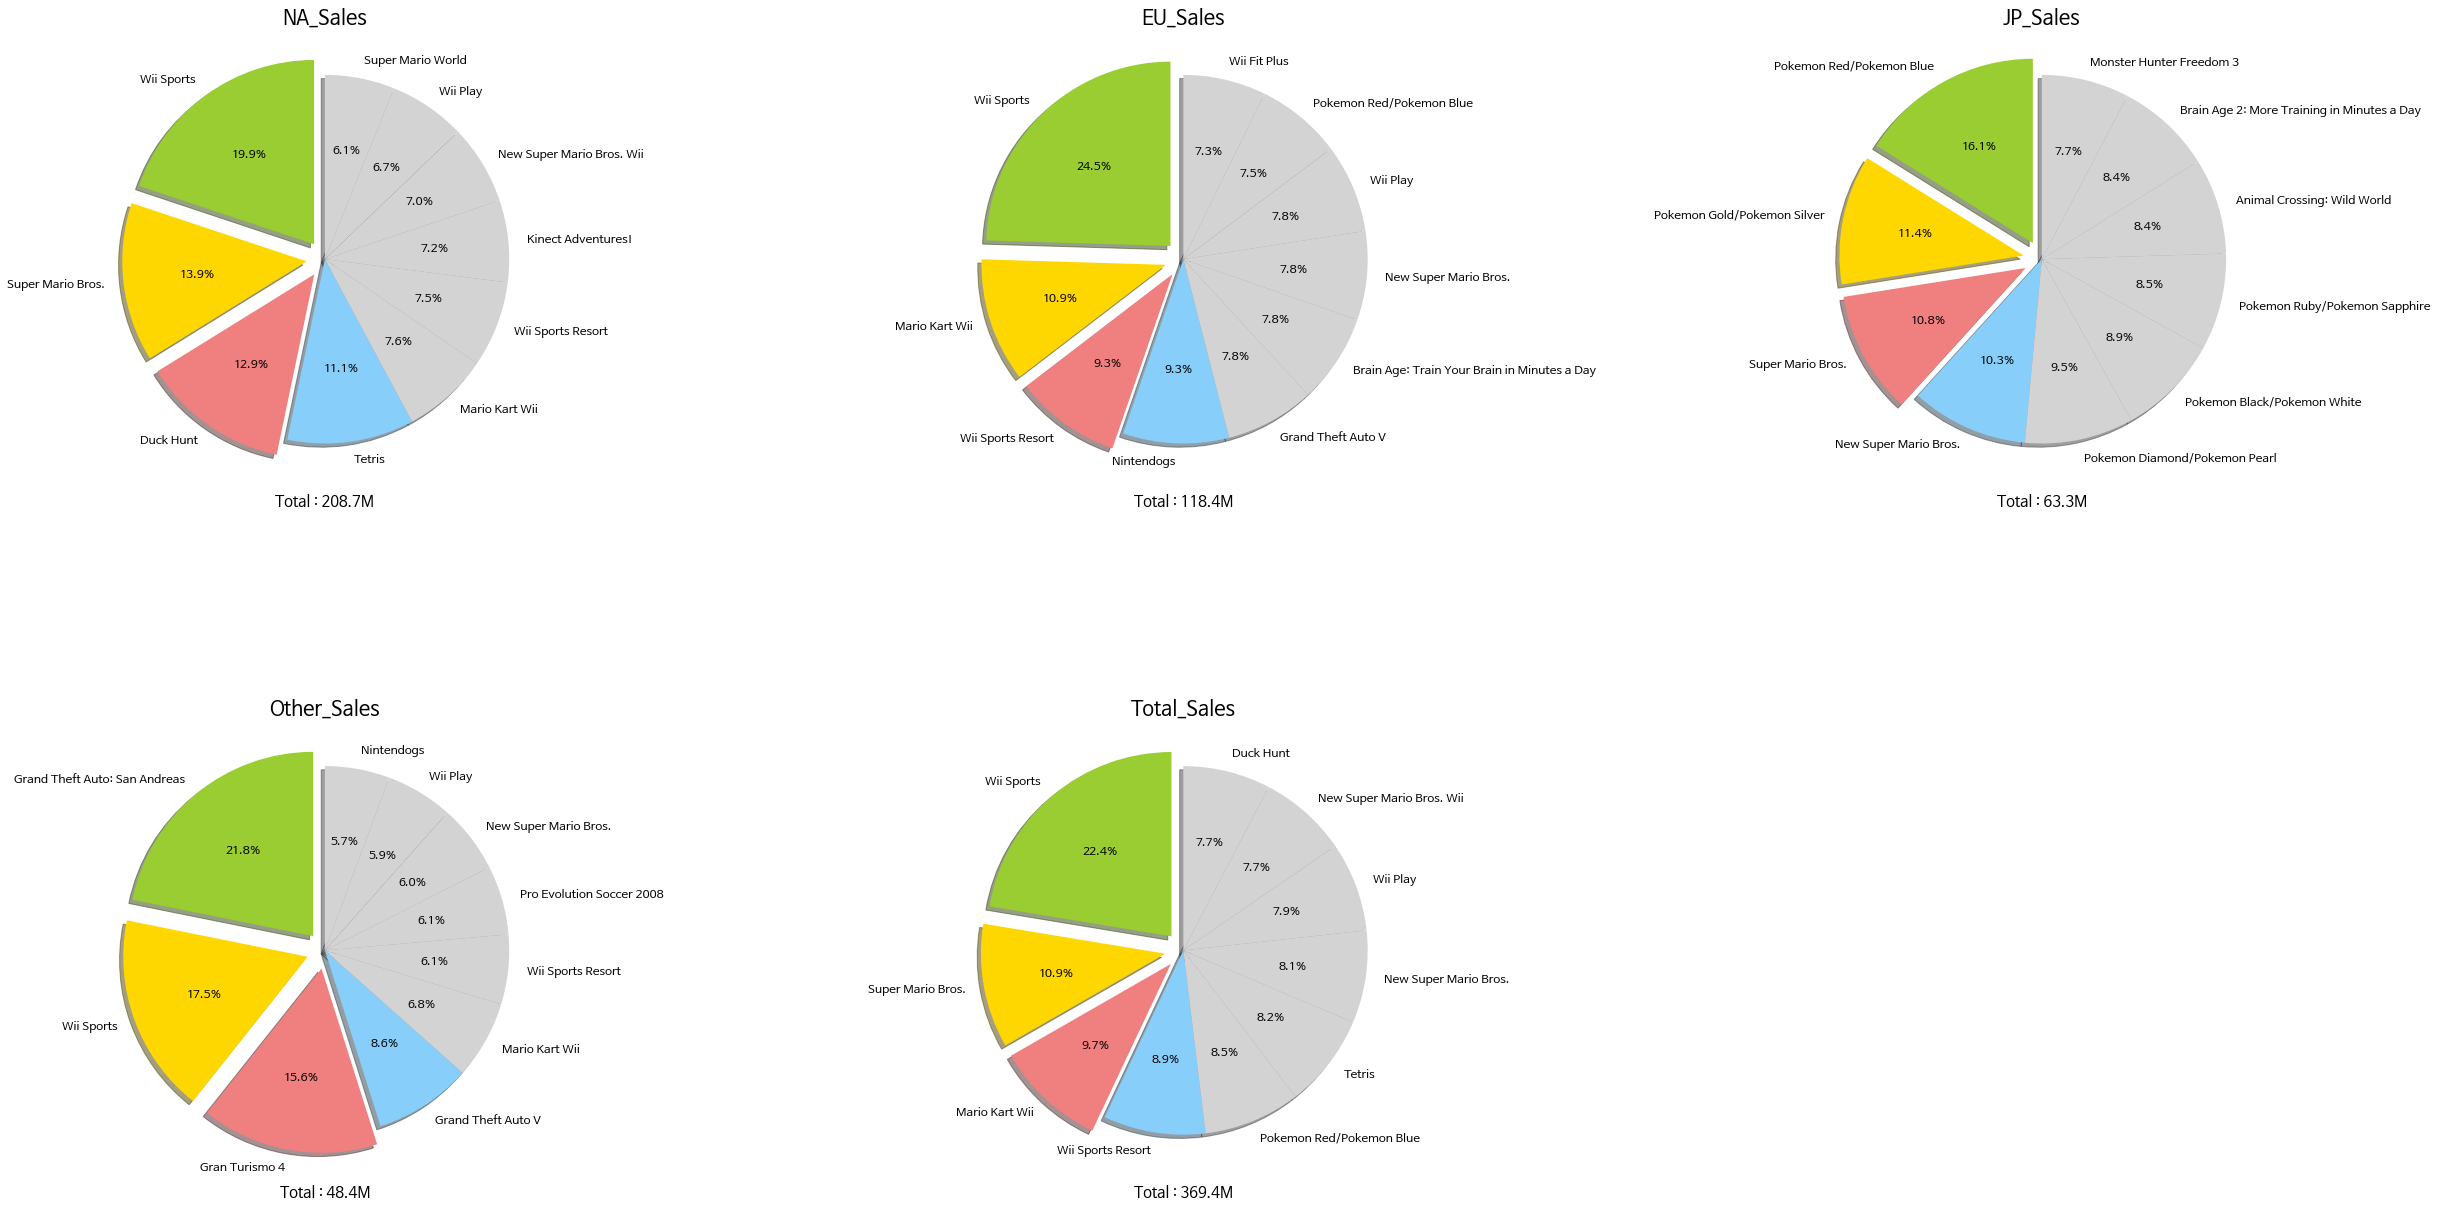

In [42]:
# Game top10 sales
colors4 = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']
textprops = dict(rotation=0, size=12, weight=10, color="Black")
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(50, 20))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.pie(size_of_game_groups[i], labels=label_game_names[i], autopct='%1.1f%%',
            colors=colors4, explode=explode, textprops=textprops,
            shadow=True, startangle=90)
    plt.title(total_group[i], fontsize=20)
    plt.xlabel('Total : {:.1f}M'.format(list_game_top10_sum[i]), fontsize=15)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=-0.2, hspace=0.5)
plt.show()

## 3.2 지역별 출고량 상위 10개 게임의 장르

In [43]:
# 전체 지역, 각 지역, 장르 이름
df1_genre = df1.loc[:, ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# 결측치 확인
print(df1_genre.isna().sum())
print('---')

df1_genre.head()

Genre          50
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64
---


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04


In [44]:
# 결측치 제거
df1_genre1 = df1_genre.dropna()

# Total_sales 열 생성
df1_genre1['Total_Sales'] = df1_genre1['NA_Sales'] + df1_genre1['EU_Sales'] + df1_genre1['JP_Sales'] + df1_genre1['Other_Sales']

# Genre로 묶은 총합
df1_genre2 = df1_genre1.groupby('Genre', as_index=False).sum()
df1_genre2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,874.81,522.16,157.90,186.45,1741.32
1,Adventure,105.66,64.05,51.95,16.81,238.47
2,Fighting,223.20,101.22,87.34,36.64,448.40
3,Misc,408.05,212.36,105.27,74.04,799.72
4,Platform,446.44,201.61,130.65,51.53,830.23
5,Puzzle,123.35,50.73,56.87,12.52,243.47
6,Racing,357.19,237.10,56.40,77.10,727.79
7,Role-Playing,319.54,183.58,344.95,56.96,905.03
8,Shooter,581.92,313.05,38.28,102.65,1035.90
9,Simulation,182.96,113.35,63.70,31.48,391.49


In [45]:
# 각 sales 데이터 그룹화
df1_genre_top10, label_genre_names, size_of_genre_groups, list_genre_top10_sum,  = [], [], [], []

for i in range(5):
    globals()['df1_genre_{}_top10'.format(i)] = df1_genre2.sort_values(by=total_group[i], ascending=False)
    globals()['df1_genre_{}_top10'.format(i)] = globals()['df1_genre_{}_top10'.format(i)].reset_index(drop=True)
    globals()['df1_genre_{}_top10'.format(i)] = globals()['df1_genre_{}_top10'.format(i)].drop(globals()['df1_genre_{}_top10'.format(i)].index[10:])
    df1_genre_top10.append(globals()['df1_genre_{}_top10'.format(i)])
    label_genre_names.append(globals()['df1_genre_{}_top10'.format(i)].Genre)
    size_of_genre_groups.append(globals()['df1_genre_{}_top10'.format(i)][total_group[i]])
    list_genre_top10_sum.append(globals()['df1_genre_{}_top10'.format(i)][total_group[i]].sum())

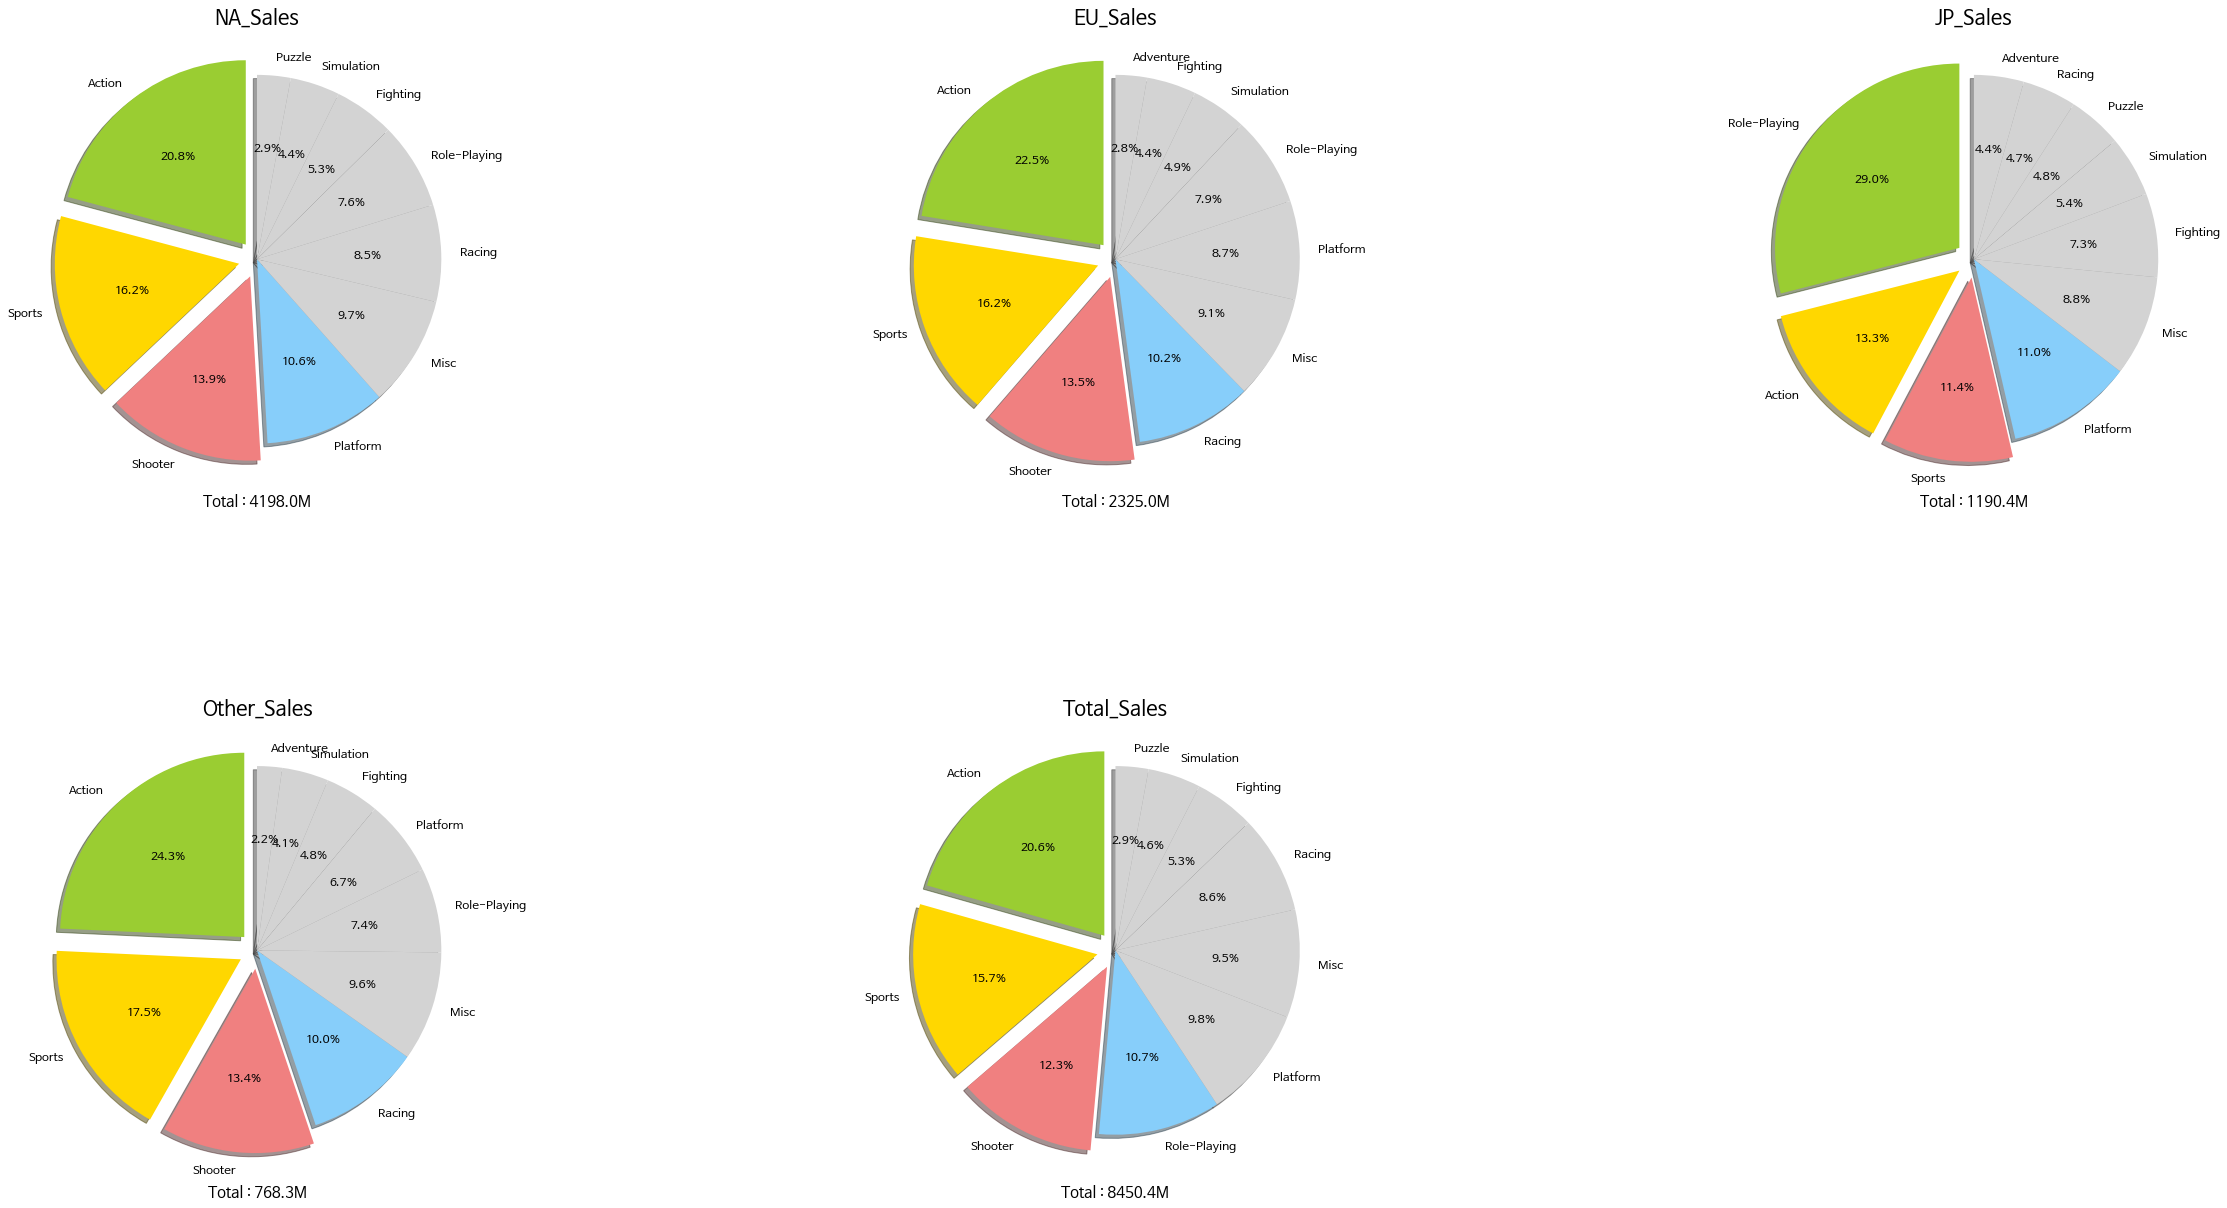

In [46]:
# 전체, 4개지역 genre top10 sales
colors4 = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']
textprops = dict(rotation=0, size=12, weight=10, color="Black")
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(50, 20))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.pie(size_of_genre_groups[i], labels=label_genre_names[i], autopct='%1.1f%%',
            colors=colors4, explode=explode, textprops=textprops,
            shadow=True, startangle=90)
    plt.title(total_group[i], fontsize=20)
    plt.xlabel('Total : {:.1f}M'.format(list_genre_top10_sum[i]), fontsize=15)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=-0.2, hspace=0.5)
plt.show()

## 3.3 지역별 출고량 상위 10개 게임의 플랫폼

In [47]:
# 전체 지역, 각 지역, 플랫폼
df1_Platform = df1.loc[:, ['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Total_sales 열 생성
df1_Platform['Total_Sales'] = df1_Platform['NA_Sales'] + df1_Platform['EU_Sales'] + df1_Platform['JP_Sales'] + df1_Platform['Other_Sales']
df1_Platform1 = df1_Platform.groupby('Platform', as_index=False).sum()

# 결측치 확인
print(df1_Platform.isna().sum())
print('---')

df1_Platform1.head()

Platform       0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64
---


,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2600,90.60,5.47,0.00,0.91,96.98
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,78.87,58.52,97.35,12.63,247.37
3,DC,5.43,1.69,8.56,0.27,15.95
4,DS,390.71,194.65,175.57,60.53,821.46


In [48]:
# 각 sales 데이터 그룹화
df1_Platform_top10, label_Platform_names, size_of_Platform_groups, list_Platform_top10_sum,  = [], [], [], []

for i in range(5):
    globals()['df1_Platform_{}_top10'.format(i)] = df1_Platform1.sort_values(by=total_group[i], ascending=False)
    globals()['df1_Platform_{}_top10'.format(i)] = globals()['df1_Platform_{}_top10'.format(i)].reset_index(drop=True)
    globals()['df1_Platform_{}_top10'.format(i)] = globals()['df1_Platform_{}_top10'.format(i)].drop(globals()['df1_Platform_{}_top10'.format(i)].index[10:])
    df1_Platform_top10.append(globals()['df1_Platform_{}_top10'.format(i)])
    label_Platform_names.append(globals()['df1_Platform_{}_top10'.format(i)].Platform)
    size_of_Platform_groups.append(globals()['df1_Platform_{}_top10'.format(i)][total_group[i]])
    list_Platform_top10_sum.append(globals()['df1_Platform_{}_top10'.format(i)][total_group[i]].sum())

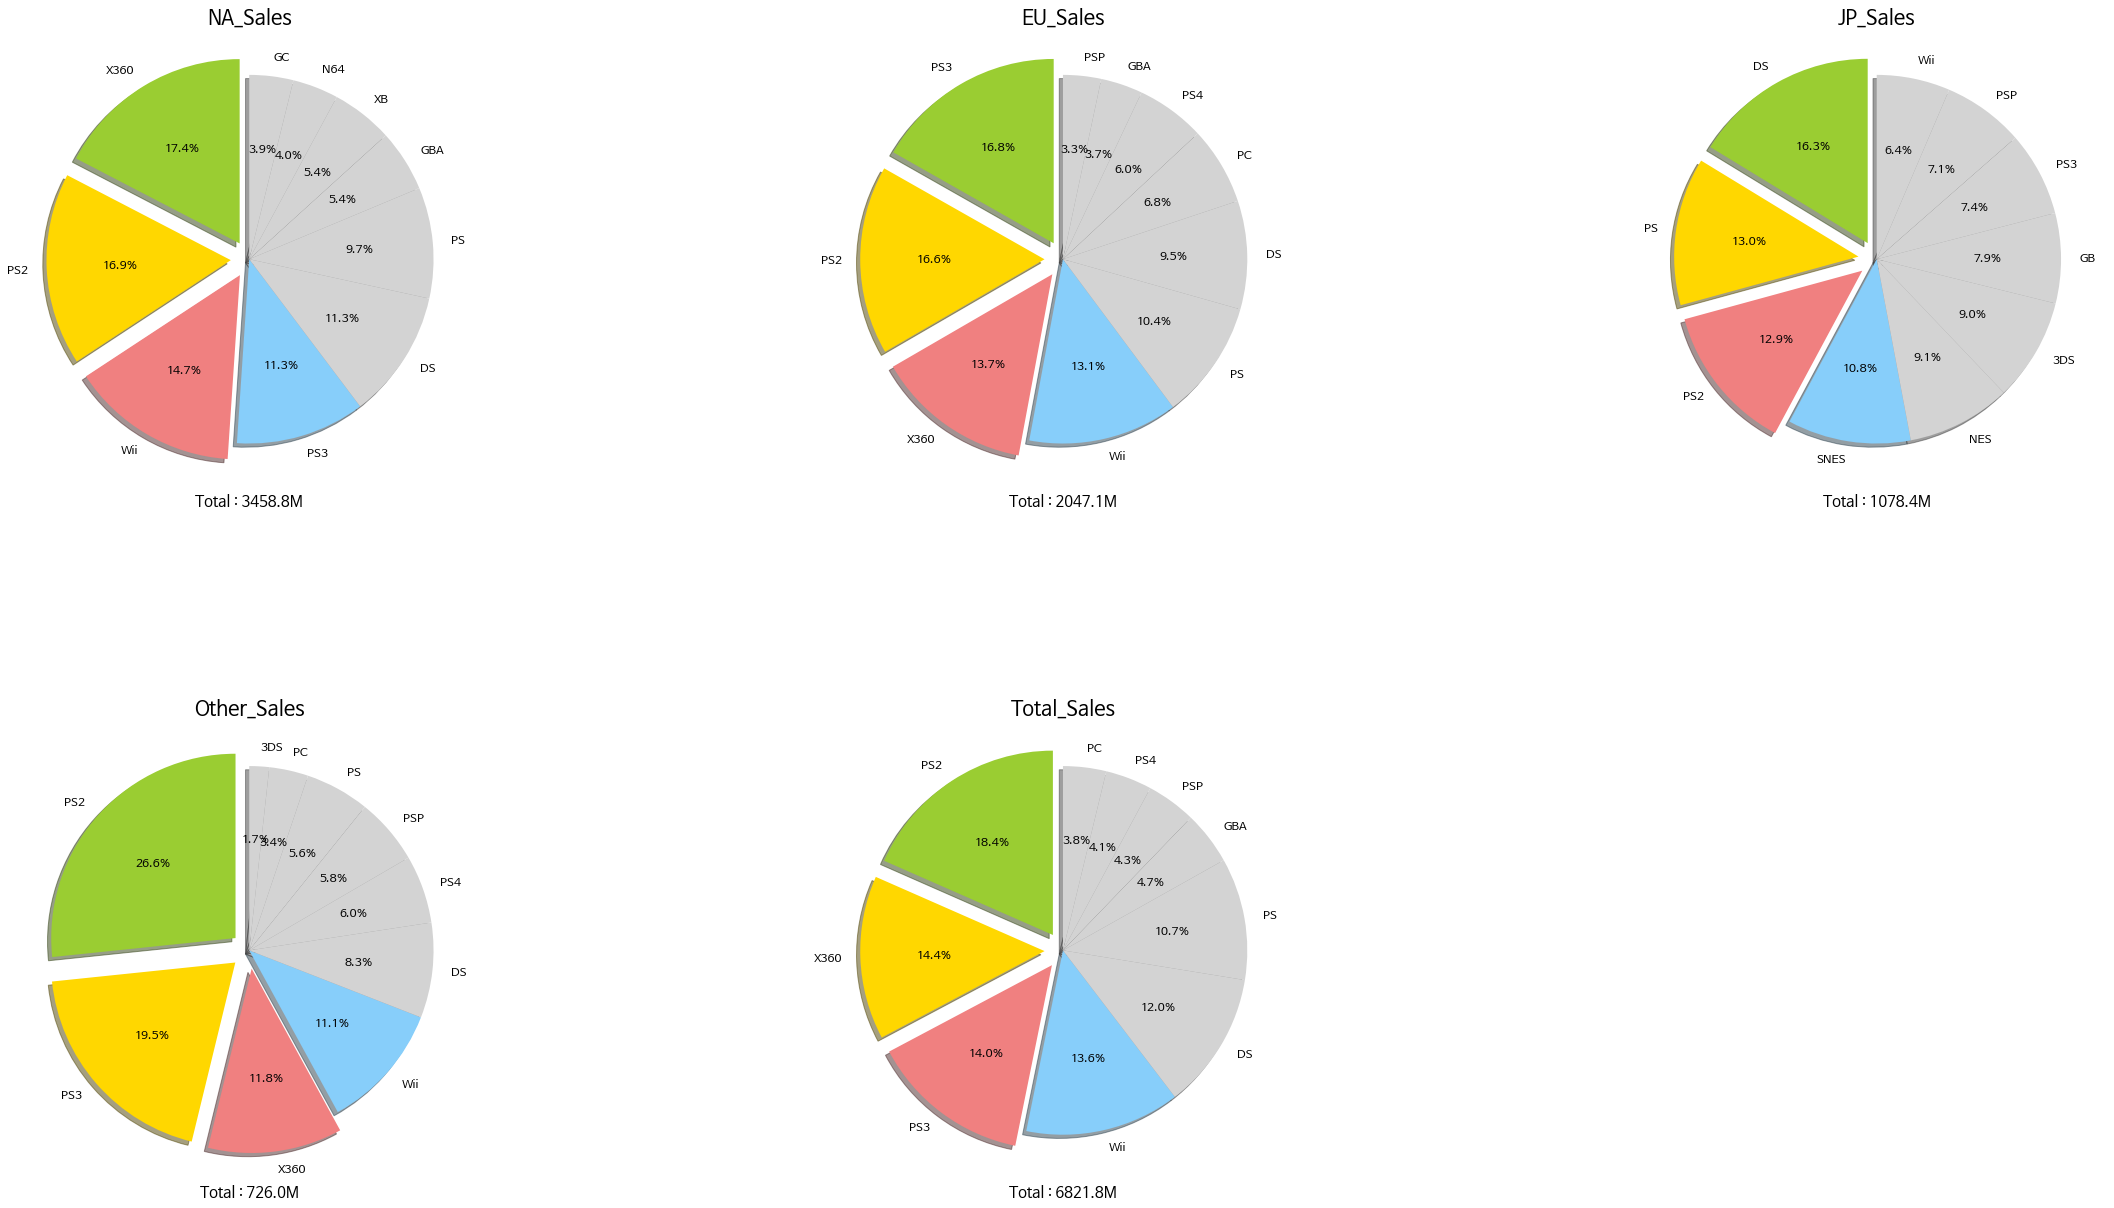

In [49]:
# 전체, 4개지역 Game top10 sales
colors4 = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']
textprops = dict(rotation=0, size=12, weight=10, color="Black")
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(50, 20))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.pie(size_of_Platform_groups[i], labels=label_Platform_names[i], autopct='%1.1f%%',
            colors=colors4, explode=explode, textprops=textprops,
            shadow=True, startangle=90)
    plt.title(total_group[i], fontsize=20)
    plt.xlabel('Total : {:.1f}M'.format(list_Platform_top10_sum[i]), fontsize=15)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=-0.3, hspace=0.5)
plt.show()

---

# 결론

#**가설 1. 지역에 따라 선호하는 게임 장르가 다를까?**
## 👉 지역에 따라 선호하는 게임 장르가 다르다.

#**가설 2. 연도별 게임의 트렌드가 있을까?**
## 👉 연도별 최근 10년을 기준으로
* **장르**
1. Action
2. Shooter
3. Sports

* **플랫폼**
1. PS4
2. X360

#**가설 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**
## 👉 지역별 선호 장르, 플랫폼
* **장르**
1. NA : Action, Sports
2. EU : Action, Sports
3. JP : Role-playing, Action
4. Other : Action, Sports

* **플랫폼**
1. NA : X360, PS2
2. EU : PS3, PS2
3. JP : DS, Ps
4. Other : PS2, PS3

# 결론 : 다음 분기에 어떤 게임을 설계해야 할까?
## 👉 따라서, 다음 분기에는 출고량이 가장 많은 북아메리카를 중심으로 게임을 설계하는게 좋다고 생각합니다. PS 플렛폼을 기반으로 ACTION 장르 게임을 설계하는게 합리적이라고 생각합니다. PS은 전 지역을 통틀어서 가장 선호하는 플렛폼이므로 PS 중심으로 설계를 하고, X360도 호환이 되는 게임을 설계하면 좋을 것 같습니다.
